In [14]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import sklearn
import scipy
%matplotlib inline

In [60]:
import os

df = pd.DataFrame()
raw = pd.DataFrame()
for name in os.listdir( r'''C:\Users\Vasu\Downloads\turbo_data'''):
    #print(name)
    file_name = r'''C:\Users\Vasu\Downloads\turbo_data''' +'\\'+name
    raw = pd.read_csv(file_name, names = ['instance', 'timestmp', 'equip_id', 'gasturbine'], parse_dates=['timestmp'], index_col = 'instance', skiprows=1)
    df = df.append(raw)



In [62]:
df.equip_id.unique()

array([114032, 172569, 206851, 210380, 213017, 227020, 279874, 325271,
       327662, 329164, 329992, 334882, 386602, 402316, 403846, 416488,
       435117, 466097, 470255, 506653, 536260, 573426, 584128, 593289,
       623090, 626144, 758703, 768593, 848584, 876114, 883370, 885752,
       904647, 921490, 963425, 981830], dtype=object)

In [63]:
print( 'columns :',df.columns)
print('Size:',df.shape)
df.head(4)

columns : Index(['timestmp', 'equip_id', 'gasturbine'], dtype='object')
Size: (563640, 3)


,timestmp,equip_id,gasturbine
instance,,,
998,2011-06-10 02:57:37,114032,0.13
999,2011-06-10 05:28:41,114032,0.16
1028,2011-06-10 13:32:48,114032,0.17
1029,2011-06-10 15:52:48,114032,0.17


In [68]:
print (df.describe())
print ("=============================================================")
print (df.dtypes)

          gasturbine
count  563640.000000
mean        0.125954
std         0.075458
min         0.000000
25%         0.070000
50%         0.110000
75%         0.160000
max         2.810000
timestmp      datetime64[ns]
equip_id              object
gasturbine           float64
dtype: object


In [69]:
df1 = df[['timestmp','gasturbine']]
df1.head(3)

,timestmp,gasturbine
instance,,
998,2011-06-10 02:57:37,0.13
999,2011-06-10 05:28:41,0.16
1028,2011-06-10 13:32:48,0.17


In [70]:
# Setting the Date as Index
df_ts = df1.set_index('timestmp')
df_ts.sort_index(inplace=True)
print (type(df_ts))
print (df_ts.head(3))
print ("========================")
print (df_ts.tail(3))

<class 'pandas.core.frame.DataFrame'>
                     gasturbine
timestmp                       
2004-11-24 00:09:01        0.31
2004-11-24 00:19:38        0.08
2004-11-24 00:31:31        0.17
                     gasturbine
timestmp                       
2016-05-04 23:59:03       0.170
2016-05-05 00:06:53       0.104
2016-05-05 00:14:06       0.104


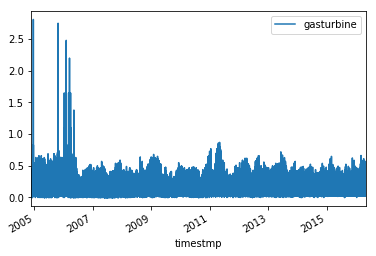

In [71]:
# Basic plot 
df_ts.plot()

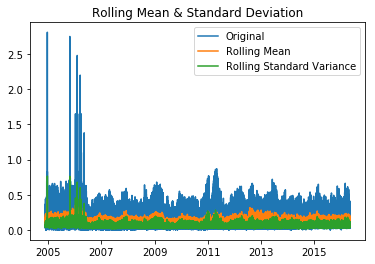

In [72]:
ts = df_ts['gasturbine']

# Let's plot the 12-Month Moving Rolling Mean & Variance and find Insights
# Rolling Statistics
rolmean = ts.rolling(window=12).mean()
rolvar = ts.rolling(window=12).std()

plt.plot(ts, label='Original')
plt.plot(rolmean, label='Rolling Mean')
plt.plot(rolvar, label='Rolling Standard Variance')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

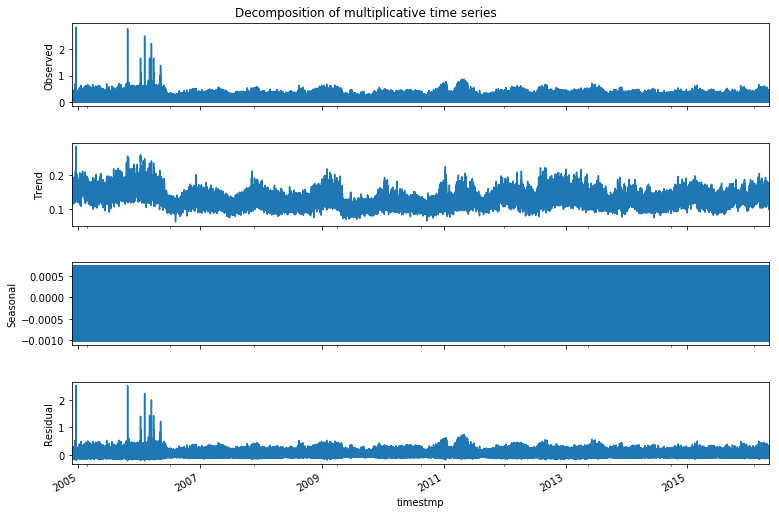

In [77]:
# Lets do a quick vanila decomposition to see any trend seasonality etc in the ts
decomposition = sm.tsa.seasonal_decompose(ts, model='additive', freq=30)

fig = decomposition.plot()
fig.set_figwidth(12)
fig.set_figheight(8)
fig.suptitle('Decomposition of multiplicative time series')
plt.show()

Conslusion

Seasonal graph is too stacked - leaving us quite unequipped to sight anything specific. This was obvious by the way since we are analyzing daily data.

Let's try out a Monthly approach

In [78]:
# Lets Resample the data by Month and analyze again
df_ts_m = df_ts.resample('M').mean()
print (type(df_ts_m))
print (df_ts_m.head(3))

<class 'pandas.core.frame.DataFrame'>
            gasturbine
timestmp              
2004-11-30    0.155383
2004-12-31    0.158354
2005-01-31    0.156381


In [79]:
tsm = df_ts_m['gasturbine']
print (type(tsm))

<class 'pandas.core.series.Series'>


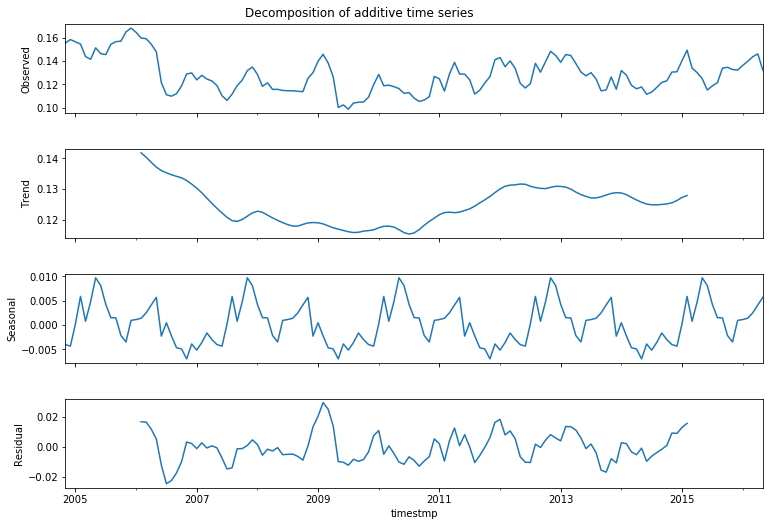

In [80]:
# Lets do a quick vanila decomposition to see any trend seasonality etc in the ts
decomposition = sm.tsa.seasonal_decompose(tsm, model='additive', freq=30)

fig = decomposition.plot()
fig.set_figwidth(12)
fig.set_figheight(8)
fig.suptitle('Decomposition of additive time series')
plt.show()

In [81]:

tsmlog = np.log10(tsm)
tsmlog.dropna(inplace=True)

tsmlogdiff = tsmlog.diff(periods=1)
tsmlogdiff.dropna(inplace=True)

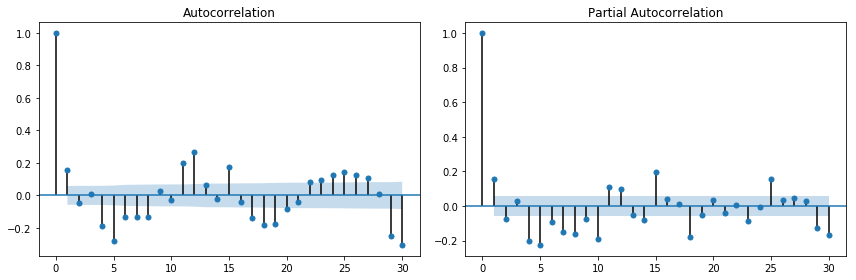

In [83]:
# Let's plot ACF & PACF graphs to visualize AR & MA components
import statsmodels.tsa.api as smt
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(tsmlogdiff, lags=30, ax=axes[0], alpha=0.5)
smt.graphics.plot_pacf(tsmlogdiff, lags=30, ax=axes[1], alpha=0.5)
plt.tight_layout()

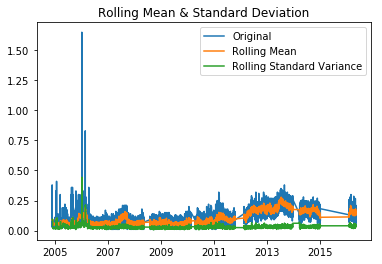

In [89]:
df2 = df[df.equip_id == 329992][['timestmp','gasturbine']]
df_ts = df2.set_index('timestmp')
df_ts.sort_index(inplace=True)
ts = df_ts['gasturbine']

# Let's plot the 12-Month Moving Rolling Mean & Variance and find Insights
# Rolling Statistics
rolmean = ts.rolling(window=12).mean()
rolvar = ts.rolling(window=12).std()

plt.plot(ts, label='Original')
plt.plot(rolmean, label='Rolling Mean')
plt.plot(rolvar, label='Rolling Standard Variance')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)         